In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
training = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Santander Customer Transaction Prediction/train.csv')

testing = pd.read_csv('C:/Users/hangu/Creative Cloud Files/0. Data Science study/Datasets/Santander Customer Transaction Prediction/test.csv')

In [3]:
print(training.shape)
print(testing.shape)

(200000, 202)
(200000, 201)


In [4]:
training

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,train_199995,0,11.4880,-0.4956,8.2622,3.5142,10.3404,11.6081,5.6709,15.1516,...,6.1415,13.2305,3.9901,0.9388,18.0249,-1.7939,2.1661,8.5326,16.6660,-17.8661
199996,train_199996,0,4.9149,-2.4484,16.7052,6.6345,8.3096,-10.5628,5.8802,21.5940,...,4.9611,4.6549,0.6998,1.8341,22.2717,1.7337,-2.1651,6.7419,15.9054,0.3388
199997,train_199997,0,11.2232,-5.0518,10.5127,5.6456,9.3410,-5.4086,4.5555,21.5571,...,4.0651,5.4414,3.1032,4.8793,23.5311,-1.5736,1.2832,8.7155,13.8329,4.1995
199998,train_199998,0,9.7148,-8.6098,13.6104,5.7930,12.5173,0.5339,6.0479,17.0152,...,2.6840,8.6587,2.7337,11.1178,20.4158,-0.0786,6.7980,10.0342,15.5289,-13.9001


In [5]:
# Function to create scrollable table within a small window
def create_scrollable_table(df, table_id, title):
    html = f'<h3>{title}</h3>'
    html += f'<div id="{table_id}" style="height:200px; overflow:auto;">'
    html += df.to_html()
    html += '</div>'
    return html

In [6]:
summary_train = training.describe().T
scroll_summary_train = create_scrollable_table(summary_train, 'summary_train', 'Summary statistic (Training)')
display(HTML(scroll_summary_train))

,count,mean,std,min,25%,50%,75%,max
target,200000.0,0.100490,0.300653,0.0000,0.000000,0.00000,0.000000,1.0000
var_0,200000.0,10.679914,3.040051,0.4084,8.453850,10.52475,12.758200,20.3150
var_1,200000.0,-1.627622,4.050044,-15.0434,-4.740025,-1.60805,1.358625,10.3768
var_2,200000.0,10.715192,2.640894,2.1171,8.722475,10.58000,12.516700,19.3530
var_3,200000.0,6.796529,2.043319,-0.0402,5.254075,6.82500,8.324100,13.1883
var_4,200000.0,11.078333,1.623150,5.0748,9.883175,11.10825,12.261125,16.6714
var_5,200000.0,-5.065317,7.863267,-32.5626,-11.200350,-4.83315,0.924800,17.2516
var_6,200000.0,5.408949,0.866607,2.3473,4.767700,5.38510,6.003000,8.4477
var_7,200000.0,16.545850,3.418076,5.3497,13.943800,16.45680,19.102900,27.6918
var_8,200000.0,0.284162,3.332634,-10.5055,-2.317800,0.39370,2.937900,10.1513


In [7]:
target_0_perc = len(training[training['target'] == 0]) / len(training) * 100
print(f'Percentage of none-transaction row: {target_0_perc:.2f}%\n')

target_1_perc = len(training[training['target'] == 1]) / len(training) * 100
print(f'Percentage of transaction row: {target_1_perc:.2f}%')

Percentage of none-transaction row: 89.95%

Percentage of transaction row: 10.05%


In [8]:
training.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Columns: 202 entries, ID_code to var_199
dtypes: float64(200), int64(1), object(1)
memory usage: 308.2+ MB


In [18]:
def check_null(df):
    total = df.isnull().sum()
    percent = df.isnull().sum()/df.shape[0]*100
    table = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
    types = []
    for col in df.columns:
        types.append(str(df[col].dtype))
    table['Types'] = types

    return table

In [20]:
null_count = check_null(training)
scroll_null_count = create_scrollable_table(null_count, 'null_count', 'Checking null (training dataset)')
display(HTML(scroll_null_count))

#No null values

,Total,Percent,Types
ID_code,0,0.0,object
target,0,0.0,int64
var_0,0,0.0,float64
var_1,0,0.0,float64
var_2,0,0.0,float64
var_3,0,0.0,float64
var_4,0,0.0,float64
var_5,0,0.0,float64
var_6,0,0.0,float64
var_7,0,0.0,float64


In [21]:
null_count = check_null(testing)
scroll_null_count = create_scrollable_table(null_count, 'null_count', 'Checking null (testing dataset)')
display(HTML(scroll_null_count))

#No null values

,Total,Percent,Types
ID_code,0,0.0,object
var_0,0,0.0,float64
var_1,0,0.0,float64
var_2,0,0.0,float64
var_3,0,0.0,float64
var_4,0,0.0,float64
var_5,0,0.0,float64
var_6,0,0.0,float64
var_7,0,0.0,float64
var_8,0,0.0,float64


In [12]:
df_num = training.select_dtypes(include=np.number)
df_num.shape

(200000, 201)

In [13]:
df_cat = training.select_dtypes(include='object')
df_cat.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 1 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   ID_code  200000 non-null  object
dtypes: object(1)
memory usage: 1.5+ MB


In [14]:
training.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,...,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,...,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,...,7.6421,7.7214,2.5837,10.9516,15.4305,2.0339,8.1267,8.7889,18.3560,1.9518
2,train_2,0,8.6093,-2.7457,12.0805,7.8928,10.5825,-9.0837,6.9427,14.6155,...,2.9057,9.7905,1.6704,1.6858,21.6042,3.1417,-6.5213,8.2675,14.7222,0.3965
3,train_3,0,11.0604,-2.1518,8.9522,7.1957,12.5846,-1.8361,5.8428,14.9250,...,4.4666,4.7433,0.7178,1.4214,23.0347,-1.2706,-2.9275,10.2922,17.9697,-8.9996
4,train_4,0,9.8369,-1.4834,12.8746,6.6375,12.2772,2.4486,5.9405,19.2514,...,-1.4905,9.5214,-0.1508,9.1942,13.2876,-1.5121,3.9267,9.5031,17.9974,-8.8104


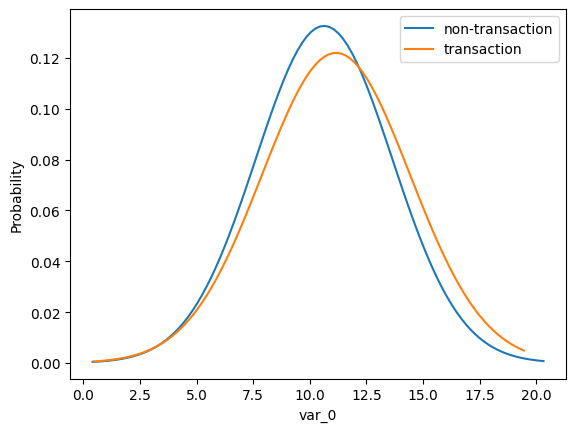

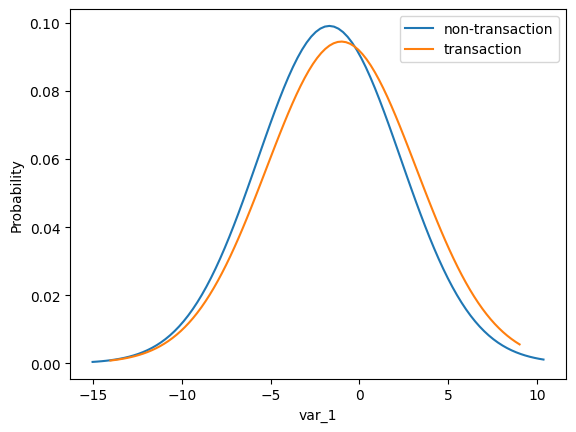

In [15]:
#Check distribution of each variable for both "transaction" and "non-transaction":

import scipy.stats as stats
df = training.drop(['ID_code', 'target'], axis=1)
df_0 = training[training['target']==0]
df_1 = training[training['target']==1]

for col in df.columns[:2]: #[:2] get examples of the first 2:
    fig, ax = plt.subplots()
    x_line = []
    y_line = []

    x_line = np.linspace(df_0[col].min(), df_0[col].max(), 100)
    mu, sigma = stats.norm.fit(df_0[col])
    y_line = stats.norm.pdf(x_line, mu, sigma)
    var0_plot = sns.lineplot(x=x_line, y=y_line, label='non-transaction',ax=ax)
    
    x_line = np.linspace(df_1[col].min(), df_1[col].max(), 100)
    mu, sigma = stats.norm.fit(df_1[col])
    y_line = stats.norm.pdf(x_line, mu, sigma)
    var0_plot = sns.lineplot(x=x_line, y=y_line, label='transaction',ax=ax)

    ax.set_ylabel('Probability')
    ax.set_xlabel(col)
    plt.show()

    # Variables with similar distribution between "non-transaction" and "transaction":
    # ['var_3', 'var_4', 'var_7', 'var_10', 'var_14', 'var_17', 'var_27', 'var_29', 'var_30', 'var_38', 'var_39', 'var_41', 'var_42', 'var_46', 'var_47', 'var_59', 'var_61', 'var_65', 'var_73', 'var_79', 'var_96', 'var_98', 'var_100', 'var_103', 'var_117', 'var_120', 'var_124', 'var_126', 'var_129', 'var_136', 'var_158', 'var_160', 'var_161', 'var_182', 'var_183', 'var_185', 'var_189']
    

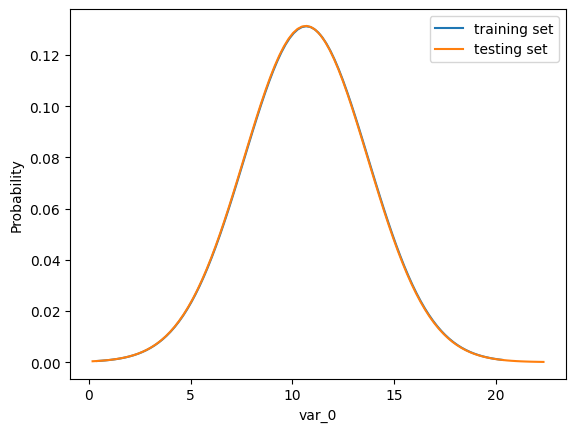

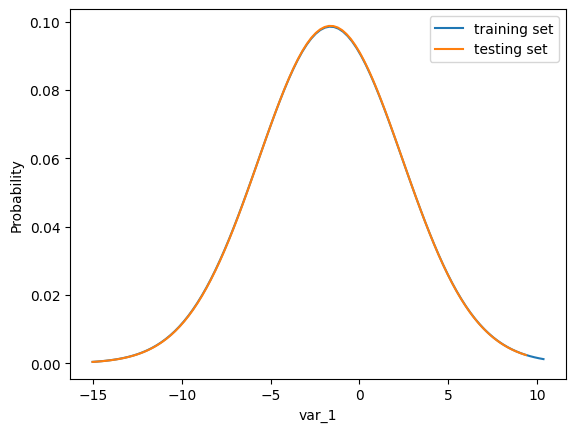

In [16]:
#Check distribution of each variable for "training" and "testing" sets:
import scipy.stats as stats
df_train = training.drop(['ID_code', 'target'], axis=1)
df_test = testing.drop(['ID_code'], axis=1)

for col in df_train.columns[:2]: #[:2] get examples of the first 2
    fig, ax = plt.subplots()
    x_line = []
    y_line = []

    x_line = np.linspace(df_train[col].min(), df_train[col].max(), 100)
    mu, sigma = stats.norm.fit(df_train[col])
    y_line = stats.norm.pdf(x_line, mu, sigma)
    var0_plot = sns.lineplot(x=x_line, y=y_line, label='training set',ax=ax)
    
    x_line = np.linspace(df_test[col].min(), df_test[col].max(), 100)
    mu, sigma = stats.norm.fit(df_test[col])
    y_line = stats.norm.pdf(x_line, mu, sigma)
    var0_plot = sns.lineplot(x=x_line, y=y_line, label='testing set',ax=ax)

    ax.set_ylabel('Probability')
    ax.set_xlabel(col)
    plt.show()

    # Variables with different distribution between "training" and "testing" sets:
    # [None]